In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from main.utils import load_experiment, load_experiments

%reload_ext autoreload
%autoreload 2

In [55]:
plt.style.use('seaborn-v0_8-paper')

## Redundant MNIST

In [59]:
# load entropy results from pickle file
random_ids = ['10x_redundant_random_' + str(i) for i in range(1, 6)]
bald_ids = ['5x_redundant_bald_' + str(i) for i in range(1, 6)]
logdet_ids = ['10x_redundant_logdet_' + str(i) for i in range(1, 6)]
batch_sizes = [40 + i * 5 for i in range(13)]

id_list = [random_ids, bald_ids, logdet_ids]

(ActiveLearningConfig(subset_of_weights='last_layer', hessian_structure='kron', backend='AsdlGGN', temperature=1.0, max_training_samples=100, acquisition_batch_size=5, al_method='random', test_batch_size=512, num_classes=10, num_initial_samples=40, training_iterations=24576, scoring_batch_size=64, train_batch_size=64, extract_pool=0, num_repeats=10, samples_per_digit=50), {'test_accs': [72.12, 71.49, 72.49, 71.15, 73.01, 75.29, 74.37, 73.79, 75.71, 77.23, 75.47, 79.49, 77.69], 'test_loss': [tensor(-0.0107), tensor(-0.0177), tensor(-0.0162), tensor(-0.0200), tensor(-0.0127), tensor(-0.0251), tensor(-0.0231), tensor(-0.0155), tensor(-0.0217), tensor(-0.0286), tensor(-0.0239), tensor(-0.0196), tensor(-0.0209)], 'added_indices': [array([4415, 2793, 1076, 4021,  876], dtype=int64), array([3206,  263, 4974,   88, 4617], dtype=int64), array([3462, 3014,  704, 4046, 4801], dtype=int64), array([2160, 1813, 2583, 2703,  539], dtype=int64), array([4664, 4210, 3263, 3762, 4145], dtype=int64), arra

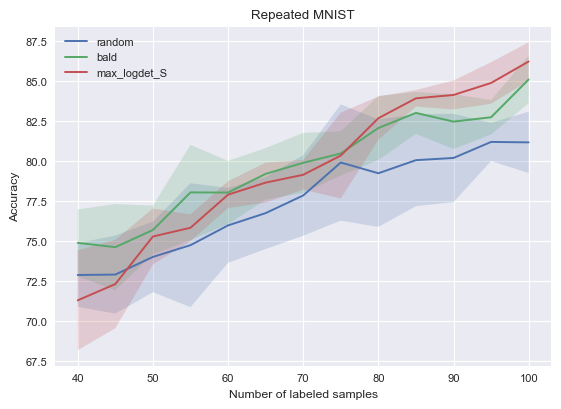

In [62]:
for method in id_list:
    results = load_experiments(method)
    print(results[0])
    accuracies = np.array([result[1]['test_accs'] for result in results])
    std = np.std(accuracies, axis=0)
    mean = np.mean(accuracies, axis=0)
    plt.plot(batch_sizes, mean, label=results[0][0].al_method)
    plt.fill_between(batch_sizes, mean - std, mean + std, alpha=0.2)

    plt.legend()
    plt.xlabel('Number of labeled samples')
    plt.ylabel('Accuracy')
    plt.title('Repeated MNIST')